In [201]:
#IMPORT LIBRARIES 
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [202]:
covid_confirmed = pd.read_csv(r"time_series_covid_19_confirmed.csv")
covid_deaths = pd.read_csv(r"time_series_covid_19_deaths.csv")
covid_recovered = pd.read_csv(r"time_series_covid_19_recovered.csv")

In [203]:
covid_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,59,70,75,82,114,147,177,212,272,322
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,639,639,701,773,839,825,878,889,924,963
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,178,178,200,212,226,243,266,313,345,385
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,149,149,197,238,428,566,673,790,900,1030


In [204]:
covid_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,NaN,Japan,36.0000,138.0000,0,0,0,0,0,0,...,15,16,19,22,22,27,29,29,29,33
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,0,0,0,0,0,0,2,2,2,3


In [205]:
covid_recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,2,2,...,34,34,35,35,35,35,41,42,42,42
1,NaN,Japan,36.0000,138.0000,0,0,0,0,1,1,...,118,118,118,118,118,144,144,144,150,191
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,96,96,97,105,105,109,114,114,114,124
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,26,26,26,35,42,42,49,60,75,87


The Data frames obtained from Kaggle concerning the total number of confirmed cases,deaths and recoveries are from the 22nd January to 20th March 

We would like to observe the general time seeries pattern of corona virus infectiond from the 22nd Jan to the 20th of March 

We find the daily averages for the period 
To do this we can create a lsit of the all the days that data was collected andcreate a dataframe made up of this alone

In [206]:
confirmed_column = covid_confirmed.columns.values
dates = [] 
for date in range(len(confirmed_column)):
    if (date >= 4):
        dates.append(confirmed_column[date])

In [207]:
def filter_out_dates(df,dates):
    new_df = df.filter(dates)
    return new_df;
confirmed_case_df = filter_out_dates(covid_confirmed,dates)
covid_death_df = filter_out_dates(covid_deaths,dates)
covid_recovered_df = filter_out_dates(covid_recovered,dates)

In [208]:
#dataframe that only contains the dates and the values for those dates 

In [209]:
def sum_columns(df):
    sum_cases = df.sum(axis = 0)
    return sum_cases
confirmed_case_sum = sum_columns(confirmed_case_df)
covid_death_sum = sum_columns(covid_death_df)
covid_recovered_sum = sum_columns(covid_recovered_df)

In [210]:
def list_cases(list_data):
    total_cases = []
    for value in range(len(list_data)):
        total_cases.append(list_data[value])
    return total_cases
confirmed_case_list = list_cases(confirmed_case_sum)
covid_death_list = list_cases(covid_death_sum)
covid_recovered_list = list_cases(covid_recovered_sum)

In [211]:
def matrix_cases(list_data,dates):
    date_total_list = []
    checker = 0
    while checker < len(list_data):
        holder = []
        holder.append(dates[checker])
        holder.append(list_data[checker])
        date_total_list.append(holder)
        checker += 1
    return date_total_list
matrix_confirmed_cases = matrix_cases(confirmed_case_list,dates)
matrix_covid_deaths = matrix_cases(covid_death_list,dates)
matrix_covid_recovered = matrix_cases(covid_recovered_list,dates)

In [212]:
def make_df(list_cases):
    column_names = ['Date','Total_Cases']
    date_total_df = pd.DataFrame(list_cases,columns = column_names)
    return date_total_df
covid_positive = make_df(matrix_confirmed_cases)
covid_df_death = make_df(matrix_covid_deaths)
covid_df_recovered = make_df(matrix_covid_recovered)

In [213]:
def change_date(df):
    df.Date = pd.to_datetime(df.Date)
    df.set_index('Date',inplace=True)
change_date(covid_positive)
change_date(covid_df_death)
change_date(covid_df_recovered)

In [214]:
data = pd.concat([covid_positive, covid_df_death,covid_df_recovered],axis = 1)

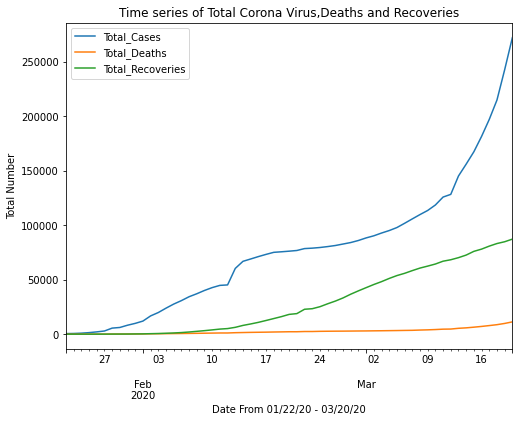

In [215]:
data.columns = ['Total_Cases','Total_Deaths','Total_Recoveries']
plt.rcParams['figure.figsize'] = (8, 6)  
data.plot()
plt.title("Time series of Total Corona Virus,Deaths and Recoveries")
plt.xlabel("Date From 01/22/20 - 03/20/20")
plt.ylabel("Total Number")
plt.show()